In [6]:
import librosa
import librosa.display
import numpy as np

/Users/Davi/github/librosa_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/Users/Davi/github/librosa_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/Davi/github/librosa_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/Users/Davi/github/librosa_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091

[[1.2666914e+00 0.0000000e+00 0.0000000e+00 ... 4.7194932e-02
  1.2831388e-01 0.0000000e+00]
 [1.2242341e+00 0.0000000e+00 7.5630903e-02 ... 5.5096045e-02
  5.2074116e-01 0.0000000e+00]
 [2.6113248e+00 1.7508984e-01 5.6399468e-02 ... 1.8885674e-01
  1.0571429e+00 0.0000000e+00]
 ...
 [4.4952558e-05 0.0000000e+00 0.0000000e+00 ... 3.7526243e-05
  4.9418741e-05 1.9925614e-05]
 [1.5680640e-05 0.0000000e+00 0.0000000e+00 ... 3.4651766e-05
  9.0139984e-06 0.0000000e+00]
 [1.9514948e-05 0.0000000e+00 0.0000000e+00 ... 9.8546479e-06
  9.1768220e-09 0.0000000e+00]]


/Users/Davi/github/librosa_env/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/Davi/github/librosa_env/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/Davi/github/librosa_env/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


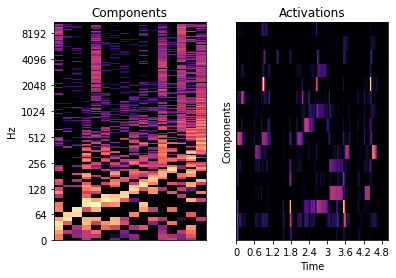

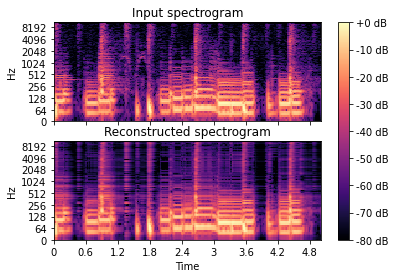

In [8]:
# Decompose a magnitude spectrogram into 32 components with NMF

y, sr = librosa.load(librosa.ex('choice'), duration=5)
S = np.abs(librosa.stft(y))
comps, acts = librosa.decompose.decompose(S, n_components=8)

# Sort components by ascending peak frequency

comps, acts = librosa.decompose.decompose(
    S, n_components=16, sort=True)

print(comps)
# Or with sparse dictionary learning

import sklearn.decomposition
T = sklearn.decomposition.MiniBatchDictionaryLearning(n_components=16)
scomps, sacts = librosa.decompose.decompose(S, transformer=T, sort=True)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2)

librosa.display.specshow(
    librosa.amplitude_to_db(
        comps, ref=np.max
    ),
    y_axis='log', ax=ax[0]
)
ax[0].set(title='Components')
librosa.display.specshow(acts, x_axis='time', ax=ax[1])
ax[1].set(ylabel='Components', title='Activations')
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(
    librosa.amplitude_to_db(
        S, ref=np.max
    ),
    y_axis='log', 
    x_axis='time', 
    ax=ax[0]
)
ax[0].set(title='Input spectrogram')
ax[0].label_outer()
S_approx = comps.dot(acts)
img = librosa.display.specshow(
    librosa.amplitude_to_db(
        S_approx, ref=np.max
    ),
    y_axis='log', 
    x_axis='time', 
    ax=ax[1]
)
ax[1].set(title='Reconstructed spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")